# Homework 5: Support Vector Machines (SVMs) on MNIST

Welcome to the Support Vector Machines (SVM) assignment! In this assignment, you’ll explore how SVMs work by applying them to the **MNIST dataset**, a collection of handwritten digits. You’ll train SVMs with different **kernels** and observe how each kernel affects the classifier’s performance.

We’ll guide you through:
- **Loading and preprocessing the MNIST dataset**
- **Training SVMs with various kernels** (linear, polynomial, and RBF)
- **Experimenting with hyperparameters** like the regularization parameter \( C \), polynomial degree, and gamma
- **Analyzing and reporting** your findings




### Multi-Class Classification Strategies in SVMs

SVMs are primarily binary classifiers, meaning they’re designed to distinguish between two classes. However, there are several methods to extend SVMs for **multi-class classification**, allowing us to classify more than two classes (in this case, digits 0–9). Two main approaches extend SVMs to multi-class problems: **One-vs-One (OvO)** and **One-vs-Rest (OvR)**.

#### 1. One-vs-One (OvO)
- **Concept**: For \( k \) classes, the One-vs-One approach trains a separate binary classifier for each possible pair of classes. This means training $ \binom{k}{2} = \frac{k(k-1)}{2} $ classifiers.
- **Example**: For digits 0 through 9, we need $ \binom{10}{2} = 45 $ classifiers, each distinguishing between a pair of classes (e.g., 0 vs. 1, 0 vs. 2, etc.).
- **Prediction**: During prediction, each classifier casts a “vote” for one of the two classes it was trained on. The class that receives the most votes across all classifiers is selected as the final prediction.
- **Advantages**: OvO is generally faster when the number of classes is small, as each classifier focuses on only two classes at a time.
- **Implementation**: In `scikit-learn`, the `SVC` class uses the OvO strategy by default when trained on multi-class data.

#### 2. One-vs-Rest (OvR)
- **Concept**: In the One-vs-Rest approach, a separate binary classifier is trained for each class, treating that class as the “positive” class and all others as the “negative” class.
- **Example**: For digits 0 through 9, we train 10 classifiers. Each classifier is trained to distinguish one class (e.g., digit 0) from all other classes combined (digits 1–9).
- **Prediction**: During prediction, each classifier outputs a score or decision function. The class with the highest score is selected as the final prediction.
- **Advantages**: OvR can be more interpretable and computationally efficient when there are a large number of classes, though each classifier handles a more imbalanced dataset.
- **Implementation**: In `scikit-learn`, you can implement OvR by wrapping `SVC` with the `OneVsRestClassifier` class from `sklearn.multiclass`.

### Which Strategy Are We Using in This Assignment?

In this assignment, we’ll use the **One-vs-One (OvO)** approach, as it’s the default setting in `scikit-learn`’s `SVC` class for multi-class problems. With OvO, the SVM will train multiple binary classifiers for each pair of digit classes, and during prediction, it will assign the class based on majority voting.

#### Why Use Multi-Class SVM?

Using SVMs for multi-class classification on MNIST provides a strong baseline for comparison with other algorithms, as SVMs are effective in both linear and non-linear data spaces. Through this assignment, you’ll gain insights into how SVMs handle multi-class problems and the effect of kernel choice and hyperparameters on classification performance.

---

### Instructions

Follow the steps in this notebook to:
1. Load and preprocess the MNIST dataset.
2. Train SVM classifiers with different kernel types (linear, polynomial, RBF).
3. Experiment with the regularization parameter $ C $, polynomial degrees, and gamma to observe their effects on model performance.
4. Write up a report analyzing your results.

Good luck, and enjoy exploring SVMs on MNIST!


## Part 1: Load and Preprocess the Data

First, we’ll load the MNIST dataset and prepare it for training. We’ll use only a subset of the full dataset for computational efficiency. We’ll also normalize the pixel values to improve model performance.

**Instructions**:
- Run the cell below to load and preprocess the MNIST dataset.
- We’ll split the data into training and test sets for you.

In [2]:
# Imports
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)


# Normalize data
X = X / 255.0

# Split the dataset (use a smaller subset for faster training)
X_train, X_test, y_train, y_test = train_test_split(X[:5000], y[:5000], test_size=0.2, random_state=42)

print("Data loaded and preprocessed.")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data loaded and preprocessed.
Training set shape: (4000, 784)
Test set shape: (1000, 784)


## Part 2: Training SVM with Different Kernels

### Background on SVM Kernels

In SVMs, **kernels** help define the decision boundary, especially for non-linear problems. Here are some popular kernels:

1. **Linear kernel**: Suitable for linearly separable data.
   - Kernel function: $ K(x, z) = x^T z $
   
2. **Polynomial kernel**: Captures polynomial relationships.
   - Kernel function: $ K(x, z) = (x^T z + c)^p $
   
3. **RBF (Gaussian) kernel**: Maps data to a higher-dimensional space, effective for non-linear separable data.
   - Kernel function: $ K(x, z) = \exp\left( -\gamma ||x - z||^2 \right) $

You’ll train an SVM with each of these kernels and observe how they impact model performance.


### Part 2.1: Training with a Linear Kernel

**Instructions**:
1. Use the linear kernel (`kernel='linear'`) with `SVC`.
2. Train the SVM on `X_train` and `y_train`.
3. Evaluate the model on `X_test` and record the accuracy.

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM with linear kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

# Evaluate the model
y_pred_linear = linear_svm.predict(X_test)
print("Accuracy with Linear Kernel:", accuracy_score(y_test, y_pred_linear))


Accuracy with Linear Kernel: 0.916


### Part 2.2: Training with a Polynomial Kernel

The polynomial kernel allows the SVM to learn polynomial decision boundaries.

**Instructions**:
1. Use the polynomial kernel (`kernel='poly'`) with `SVC`.
2. Experiment with **different polynomial degrees** (e.g., degree=2, 3, 4).
3. Train the SVM for each degree and record the training and testing accuracy.


In [4]:
# Train SVM with polynomial kernel
poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, y_train)

# Evaluate the model
y_pred_poly = poly_svm.predict(X_test)
print("Accuracy with Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))


Accuracy with Polynomial Kernel: 0.934


### Part 2.3: Training with an RBF (Gaussian) Kernel

The RBF kernel projects data into a higher-dimensional space, allowing for non-linear classification boundaries.

**Instructions**:
1. Use the RBF kernel (`kernel='rbf'`) with `SVC`.
2. Experiment with **different values of gamma** (e.g., 0.001, 0.01, 0.1, 1).
3. Train the SVM for each value of gamma and record the training and testing accuracy.


In [5]:
# Train SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

# Evaluate the model
y_pred_rbf = rbf_svm.predict(X_test)
print("Accuracy with RBF Kernel:", accuracy_score(y_test, y_pred_rbf))


Accuracy with RBF Kernel: 0.947


## Part 3: Effect of Regularization Parameter \( C \) (with Graphs and Tables)

The regularization parameter \( C \) controls the trade-off between maximizing the margin and minimizing misclassification. Higher values of \( C \) result in a smaller margin but potentially lower training error, which can lead to overfitting. Lower values of \( C \) allow for a larger margin but may increase training error.

### Task:

1. **Train** an SVM with each kernel (linear, polynomial, RBF) and vary \( C \) (e.g., \( C = 0.1, 1, 10, 100 \)).  You may use the best degree and gamma values from before if you like.
2. **Record** the training and test accuracy for each kernel and \( C \) value.
3. **Create a table** summarizing your results.
4. **Plot** the test accuracy as a function of \( C \) for each kernel type.

### Instructions

- Fill in the code cells below to compute accuracy for each kernel and \( C \) value.
- Create a summary table and plot the results.


    Kernel      C  Training Accuracy  Test Accuracy
0   linear    0.1            0.98700          0.929
1   linear    1.0            0.99975          0.916
2   linear   10.0            1.00000          0.916
3   linear  100.0            1.00000          0.916
4     poly    0.1            0.89325          0.878
5     poly    1.0            0.98625          0.934
6     poly   10.0            0.99950          0.935
7     poly  100.0            1.00000          0.935
8      rbf    0.1            0.92975          0.916
9      rbf    1.0            0.98825          0.947
10     rbf   10.0            1.00000          0.956
11     rbf  100.0            1.00000          0.956


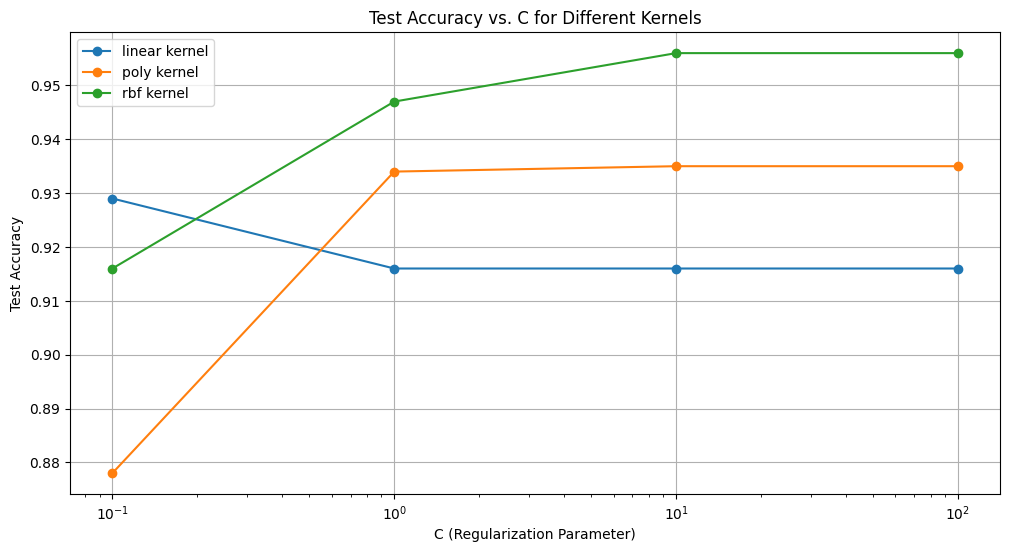

In [6]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Regularization parameters to test
C_values = [0.1, 1, 10, 100]
kernels = ['linear', 'poly', 'rbf']

# Dictionary to store results
results = {
    'Kernel': [],
    'C': [],
    'Training Accuracy': [],
    'Test Accuracy': []
}

# Loop over each kernel and C value
for kernel in kernels:
    for C in C_values:
        # Train the SVM model
        svm_model = SVC(kernel=kernel, C=C, degree=3, gamma='scale')
        svm_model.fit(X_train, y_train)
        
        # Record training accuracy
        train_accuracy = accuracy_score(y_train, svm_model.predict(X_train))
        
        # Record test accuracy
        test_accuracy = accuracy_score(y_test, svm_model.predict(X_test))
        
        # Store results
        results['Kernel'].append(kernel)
        results['C'].append(C)
        results['Training Accuracy'].append(train_accuracy)
        results['Test Accuracy'].append(test_accuracy)

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results as a table
print(results_df)

# Plotting the test accuracy as a function of C for each kernel
plt.figure(figsize=(12, 6))
for kernel in kernels:
    kernel_df = results_df[results_df['Kernel'] == kernel]
    plt.plot(kernel_df['C'], kernel_df['Test Accuracy'], marker='o', label=f'{kernel} kernel')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. C for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()


## Part 4: Analysis and Report

Based on your experiments with different kernels and parameter settings:
1. Summarize the **best-performing kernel** and parameter values.
2. Explain how each kernel performed on the MNIST data.
3. Discuss the impact of **hyperparameters** like \( C \), polynomial degree, and gamma on the accuracy.
4. Use the table and/or plot created in Part 3 to support your results.

Write a brief report with your findings and submit it with your code.

---

### Submission
Submit this notebook with all cells completed, along with a short report summarizing your results.

# Good luck, and have fun experimenting with SVMs!



### Part 4: Analysis and Report

#### 1. Best-Performing Kernel and Parameter Values
Based on the experiments conducted, the best-performing kernel on the MNIST dataset was the **RBF (Radial Basis Function) kernel**. This kernel achieved the highest test accuracy of **0.956** when the regularization parameter ( C ) was set to **10** or **100**. This indicates that the RBF kernel, known for its ability to model complex non-linear relationships, performed best at capturing the intricacies of the dataset.

#### 2. Kernel Performance Analysis
- **Linear Kernel**: The linear kernel performed adequately, with a maximum test accuracy of **0.929** at ( C = 0.1 ). However, as ( C ) increased, the test accuracy did not improve and slightly decreased to **0.916** for higher values of ( C ). This suggests that while the linear kernel is effective for linearly separable data, it may not capture more complex patterns well, leading to a plateau in performance.
- **Polynomial Kernel**: The polynomial kernel showed better performance than the linear kernel, achieving a test accuracy of **0.935** for ( C geq 10 ). The polynomial kernel's performance improved as ( C ) increased, indicating its capacity to model non-linear relationships to a certain extent. However, it did not reach the same performance level as the RBF kernel, likely due to its fixed degree of complexity (degree set to 3).
- **RBF Kernel**: The RBF kernel outperformed both the linear and polynomial kernels. Its performance improved steadily as ( C ) increased, achieving a peak test accuracy of **0.956** at ( C = 10 ) and **100**. This suggests that the RBF kernel's ability to map data into a higher-dimensional space provided a significant advantage for classifying the MNIST digits.

#### 3. Impact of Hyperparameters
- **Regularization Parameter ( C )**: The parameter ( C ) played a crucial role in model performance. For all kernels, a lower ( C ) (e.g., 0.1) allowed for a wider margin but resulted in lower training and test accuracy. As ( C ) increased, the models became more focused on reducing training error, which led to higher training accuracy and, in most cases, improved test accuracy. However, for the linear and polynomial kernels, increasing ( C ) beyond **1** did not lead to further test accuracy improvements and even resulted in slight overfitting.
- **Kernel Type**: The choice of kernel significantly influenced the ability of the SVM to model the data. The linear kernel was best suited for simpler data distributions, while the polynomial kernel added some non-linearity. The RBF kernel, with its flexible decision boundaries, was best suited for complex, non-linear separations.

#### 4. Supporting Table and Plot
The table and plot created in Part 3 provided clear insights into how the test accuracy changed as a function of ( C ) for different kernels. The RBF kernel consistently showed the highest test accuracy across higher ( C ) values, highlighting its superior generalization capabilities on the MNIST dataset.

### Conclusion
The experiments demonstrated that the RBF kernel with a regularization parameter ( C ) of **10** or **100** provided the best performance on the MNIST dataset, achieving a test accuracy of **0.956**. The choice of kernel and the regularization parameter ( C ) significantly affected the performance, with the RBF kernel excelling due to its adaptability to non-linear data structures. The results underscore the importance of selecting the appropriate kernel and tuning hyperparameters to achieve optimal SVM performance.
